In [231]:
!pip install -r requirements.txt

  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [357]:
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

nsions\varInspector\README.md
[I 09:58:04 InstallContribNbextensionsApp] Copying: c:\users\sree3\.conda\envs\python38\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\varInspector\tablesorter_LICENSE.txt -> C:\Users\sree3\AppData\Roaming\jupyter\nbextensions\varInspector\tablesorter_LICENSE.txt
[I 09:58:04 InstallContribNbextensionsApp] Copying: c:\users\sree3\.conda\envs\python38\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\varInspector\varInspector.yaml -> C:\Users\sree3\AppData\Roaming\jupyter\nbextensions\varInspector\varInspector.yaml
[I 09:58:04 InstallContribNbextensionsApp] Copying: c:\users\sree3\.conda\envs\python38\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\varInspector\var_list.py -> C:\Users\sree3\AppData\Roaming\jupyter\nbextensions\varInspector\var_list.py
[I 09:58:04 InstallContribNbextensionsApp] Copying: c:\users\sree3\.conda\envs\python38\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\varInspector\var_list.r -> 

In [2]:
import pandas as pd

In [3]:
# import the library
import googletrans
from google_trans_new import google_translator
from textblob import TextBlob
import plotly.express as px

In [4]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords,wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sree3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
%matplotlib inline

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import pyLDAvis
import pyLDAvis.sklearn
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

In [7]:
reviews = pd.read_excel('DataAdvisory/Data_Advisory_Random_Sample_tp.xlsx',engine='openpyxl')

In [8]:
reviews.head()

,review_id,created_date,stars,Title,Text,source,language
0,5f2661831a5a690a041d934b,2020-08-02 06:47:31 UTC,1,You keep removing reviews from our…,You keep removing reviews from our clients. An...,invitationapi,en
1,5f493d1302e8570814fb2d23,2020-08-28 17:21:23 UTC,5,C&#39;est gr&#226;ce &#224; votre site que j&#...,C&#39;est gr&#226;ce &#224; votre site que j&#...,invitationlinkapi,fr
2,5ea6c1a3086b6409bc8ebd99,2020-04-27 11:27:31 UTC,4,Merci de nous permettre de donner notre…,Merci de nous permettre de donner notre avis a...,invitationlinkapi,fr
3,5f46e07302e85708c8d9a6ee,2020-08-26 22:21:39 UTC,5,Trustpilot,Excellent company cannot thank you enough for ...,invitationlinkapi,en
4,5eaca4c7086b6409bc93429c,2020-05-01 22:37:59 UTC,5,Great,Great! Service,invitationlinkapi,en


In [55]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     10000 non-null  object
 1   created_date  10000 non-null  object
 2   stars         10000 non-null  int64 
 3   Title         9999 non-null   object
 4   Text          9999 non-null   object
 5   source        10000 non-null  object
 6   language      10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [9]:
reviews = reviews[reviews['Title'].notna()]

In [10]:
reviews[['review_id','language']].groupby(['language']).size().reset_index()

,language,0
0,af,2
1,ar,18
2,ca,3
3,co,3
4,cs,3
5,da,741
6,de,842
7,el,3
8,en,5376
9,es,348


In [11]:
reviews = reviews.loc[(reviews['language'] == 'en') | (reviews['language'] == 'fi')]

In [12]:
reviews.shape

(5391, 7)

In [13]:
reviews.head()

,review_id,created_date,stars,Title,Text,source,language
0,5f2661831a5a690a041d934b,2020-08-02 06:47:31 UTC,1,You keep removing reviews from our…,You keep removing reviews from our clients. An...,invitationapi,en
3,5f46e07302e85708c8d9a6ee,2020-08-26 22:21:39 UTC,5,Trustpilot,Excellent company cannot thank you enough for ...,invitationlinkapi,en
4,5eaca4c7086b6409bc93429c,2020-05-01 22:37:59 UTC,5,Great,Great! Service,invitationlinkapi,en
8,5e1bfb44c845450834409c76,2020-01-13 05:08:20 UTC,1,Would of given it no stars but could…,Would of given it no stars but could not. Revi...,invitationlinkapi,en
9,5f46801d02e8570814f97b94,2020-08-26 15:30:37 UTC,5,Utterly incredible,Utterly incredible,afsv2,en


In [61]:
(reviews.Title)[8]

'Would of given it no stars but could…'

In [14]:
reviews['new_title'] = reviews.Title
reviews['new_text'] = reviews.Text

In [65]:
reviews.head()

,review_id,created_date,stars,Title,Text,source,language,new_title,new_text
0,5f2661831a5a690a041d934b,2020-08-02 06:47:31 UTC,1,You keep removing reviews from our…,You keep removing reviews from our clients. An...,invitationapi,en,You keep removing reviews from our…,You keep removing reviews from our clients. An...
3,5f46e07302e85708c8d9a6ee,2020-08-26 22:21:39 UTC,5,Trustpilot,Excellent company cannot thank you enough for ...,invitationlinkapi,en,Trustpilot,Excellent company cannot thank you enough for ...
4,5eaca4c7086b6409bc93429c,2020-05-01 22:37:59 UTC,5,Great,Great! Service,invitationlinkapi,en,Great,Great! Service
8,5e1bfb44c845450834409c76,2020-01-13 05:08:20 UTC,1,Would of given it no stars but could…,Would of given it no stars but could not. Revi...,invitationlinkapi,en,Would of given it no stars but could…,Would of given it no stars but could not. Revi...
9,5f46801d02e8570814f97b94,2020-08-26 15:30:37 UTC,5,Utterly incredible,Utterly incredible,afsv2,en,Utterly incredible,Utterly incredible


In [15]:
translator = google_translator()

In [16]:
reviews_other_language = reviews.loc[reviews['language'] != 'en']

In [17]:
reviews_other_language.shape

(15, 9)

In [18]:
reviews_other_language['new_title'] = reviews_other_language['Title'].apply(lambda x: translator.translate(text = x, lang_tgt='en'))
reviews_other_language['new_text'] = reviews_other_language['Text'].apply(lambda x: translator.translate(text = x, lang_tgt='en'))

In [19]:
reviews_other_language.head()

,review_id,created_date,stars,Title,Text,source,language,new_title,new_text
126,5f5b596b02e8570a1c48534b,2020-09-11 11:03:07 UTC,5,Helppo k&#228;ytt&#228;&#228;.,Helppo k&#228;ytt&#228;&#228;.,invitationlinkapi,fi,Easy to use.,Easy to use.
1956,5e63ef393c93ae0624c87536,2020-03-07 19:00:09 UTC,5,trustpilot on t&#228;rke&#228; palautetta kun…,trustpilot on t&#228;rke&#228; palautetta kun ...,invitationlinkapi,fi,Trustpilot is an important & # 228; feedback w...,Trustpilot is an important & # 228; feedback w...
2016,5eb04bfb25e5d20a888c70e3,2020-05-04 17:08:11 UTC,5,Hyv&#228;t sivut,Hyv&#228;t sivut ja asialliset kysymykset.,invitationlinkapi,fi,Good pages,Good pages and relevant questions.
2061,5f407d9802e8570814f65eec,2020-08-22 02:06:16 UTC,5,Hyv&#228; ett&#228; johonkin saa kirjoittaa…,Hyv&#228; ett&#228; johonkin saa kirjoittaa oi...,organic,fi,Good & # 228; that & # 228; you can write some...,Good & # 228; that & # 228; you can write the ...
2244,5ee24bac7dd7530828be4a9c,2020-06-11 15:20:12 UTC,5,Yritys Trustpilot,Ainoastaan posittivisia kokemuksia t&#228;h&#2...,invitationlinkapi,fi,Company Trustpilot,Only positive experiences up to now. Good & # ...


In [20]:
reviews_translated = reviews.loc[reviews['language'] == 'en'].append(reviews_other_language)

In [21]:
import string
printable = set(string.printable)

In [22]:
reviews_translated.loc[reviews['language'] == 'fi']

,review_id,created_date,stars,Title,Text,source,language,new_title,new_text
126,5f5b596b02e8570a1c48534b,2020-09-11 11:03:07 UTC,5,Helppo k&#228;ytt&#228;&#228;.,Helppo k&#228;ytt&#228;&#228;.,invitationlinkapi,fi,Easy to use.,Easy to use.
1956,5e63ef393c93ae0624c87536,2020-03-07 19:00:09 UTC,5,trustpilot on t&#228;rke&#228; palautetta kun…,trustpilot on t&#228;rke&#228; palautetta kun ...,invitationlinkapi,fi,Trustpilot is an important & # 228; feedback w...,Trustpilot is an important & # 228; feedback w...
2016,5eb04bfb25e5d20a888c70e3,2020-05-04 17:08:11 UTC,5,Hyv&#228;t sivut,Hyv&#228;t sivut ja asialliset kysymykset.,invitationlinkapi,fi,Good pages,Good pages and relevant questions.
2061,5f407d9802e8570814f65eec,2020-08-22 02:06:16 UTC,5,Hyv&#228; ett&#228; johonkin saa kirjoittaa…,Hyv&#228; ett&#228; johonkin saa kirjoittaa oi...,organic,fi,Good & # 228; that & # 228; you can write some...,Good & # 228; that & # 228; you can write the ...
2244,5ee24bac7dd7530828be4a9c,2020-06-11 15:20:12 UTC,5,Yritys Trustpilot,Ainoastaan posittivisia kokemuksia t&#228;h&#2...,invitationlinkapi,fi,Company Trustpilot,Only positive experiences up to now. Good & # ...
4103,5f5c694002e8570a4870724b,2020-09-12 06:22:56 UTC,5,Helppo ja hy&#246;dyllinen,Helppo ja hy&#246;dyllinen,invitationlinkapi,fi,Easy and useful,Easy and useful
4245,5f0990e73f06f20a9c9ac725,2020-07-11 10:13:59 UTC,5,Homma toimii.,Homma toimii.,invitationlinkapi,fi,It works.,It works.
5218,5f44fe8902e8570814f8779e,2020-08-25 12:05:29 UTC,1,Onko jotain mielt&#228; arvostella jotain…,Onko jotain mielt&#228; arvostella jotain yrit...,invitationlinkapi,fi,Is there anything in your mind & # 228; critic...,Is there anything in your mind & # 228; critic...
5705,5ea2ddcc086b6409543f1499,2020-04-24 12:38:36 UTC,4,Hyv&#228; ja nopea&#128512;,Hyv&#228; ja nopea&#128512;,invitationlinkapi,fi,Good & # 228; and fast & # 128512;,Good & # 228; and fast & # 128512;
6328,5ed45a1925e5d209b8f95f02,2020-06-01 01:30:01 UTC,4,Ihan jees,Ihan jees toimintaa.,invitationlinkapi,fi,Pretty good,Pretty jees activities.


In [23]:
reviews_translated["new_title"] = reviews_translated["new_title"].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
reviews_translated["new_text"] = reviews_translated["new_text"].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

In [24]:
reviews_text_rating = reviews_translated[['review_id','stars','source','new_text']]

In [25]:
reviews_text_rating[['review_id','source']].groupby(['source']).size().reset_index()

,source,0
0,afsv2,116
1,basiclink,96
2,copypasteinvitation,1
3,domainlink,17
4,invitationapi,417
5,invitationlinkapi,3814
6,organic,930


In [26]:
pos_reviews = reviews_text_rating.loc[(reviews_text_rating['stars'] == 4) | (reviews_text_rating['stars'] == 5)]
neg_reviews = reviews_text_rating.loc[(reviews_text_rating['stars'] == 1) | (reviews_text_rating['stars'] == 2)]

In [27]:
neg_reviews.head()

,review_id,stars,source,new_text
0,5f2661831a5a690a041d934b,1,invitationapi,You keep removing reviews from our clients An...
8,5e1bfb44c845450834409c76,1,invitationlinkapi,Would of given it no stars but could not Revi...
11,5e2dc1c43c93ae04c0d3daa2,1,invitationlinkapi,My name isn t Hales it s Scott
12,5f7dd6a8798e6f06fc588ee2,1,organic,Trust pilot never protects the buyer out of ...
34,5f17ef791a5a69071c9283f3,1,organic,You continually block my reviews until I prove...


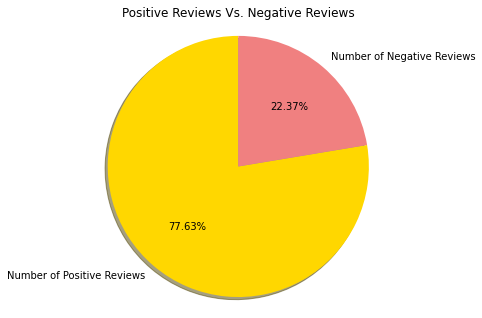

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = [len(pos_reviews), len(neg_reviews)]

ax.pie(values, 
       labels = ['Number of Positive Reviews', 'Number of Negative Reviews'],
       colors=['gold', 'lightcoral'],
       shadow=True,
       startangle=90, 
       autopct='%1.2f%%')
ax.axis('equal')
plt.title('Positive Reviews Vs. Negative Reviews');

In [29]:
# Histogram of Ratings
print(reviews_text_rating['stars'].describe())
px.histogram(reviews_text_rating, x="stars", nbins=30, title = 'Histogram of Ratings')

count    5391.000000
mean        4.037284
std         1.583396
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: stars, dtype: float64


In [30]:
# wordnet and treebank have different tagging systems
# Create a function to define a mapping between wordnet tags and POS tags 
def get_wordnet_pos(pos_tag):

    if pos_tag.startswith('J'):
        return wordnet.ADJ 

    elif pos_tag.startswith('V'):
        return wordnet.VERB 

    elif pos_tag.startswith('N'):
        return wordnet.NOUN

    elif pos_tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN # default, return wordnet tag "NOUN"

#Create a function to lemmatize tokens in the reviews
def lemmatized_tokens(text):
        text = text.lower()
        pattern = r'\b[a-zA-Z]{3,}\b'                 
        tokens = nltk.regexp_tokenize(text, pattern) # tokenize the text
        tagged_tokens = nltk.pos_tag(tokens)  # a list of tuples (word, pos_tag)
          
        stop_words = stopwords.words('english')
        new_stopwords = ["review","trustpilot"]  #customize extra stop_words
        stop_words.extend(new_stopwords)
        stop_words = set(stop_words)
        
        wordnet_lemmatizer = WordNetLemmatizer()
        # get lemmatized tokens                             #call function "get_wordnet_pos"
        lemmatized_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) 
                  # tagged_tokens is a list of tuples (word, tag)
                  for (word, tag) in tagged_tokens \
                  # remove stop words
                  if word not in stop_words and \
                  # remove punctuations
                  word not in string.punctuation]

        return lemmatized_words

In [31]:
from wordcloud import WordCloud
#Create a function to generate wordcloud
def wordcloud(review_df, review_colname, color, title):
    '''    
    INPUTS:
        reivew_df - dataframe, positive or negative reviews
        review_colname - column name, positive or negative review
        color - background color of worldcloud
        title - title of the wordcloud
    OUTPUT:
    Wordcloud visuazliation
    '''  
    text = review_df[review_colname].tolist()
    text_str = ' '.join(lemmatized_tokens(' '.join(text))) #call function "lemmatized_tokens"
    wordcloud = WordCloud(collocations = False,
                          background_color = color,
                          width=1600, 
                          height=800, 
                          margin=2,
                          min_font_size=20).generate(text_str)

    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figtext(.5,.8,title,fontsize = 20, ha='center')
    
    return wordcloud

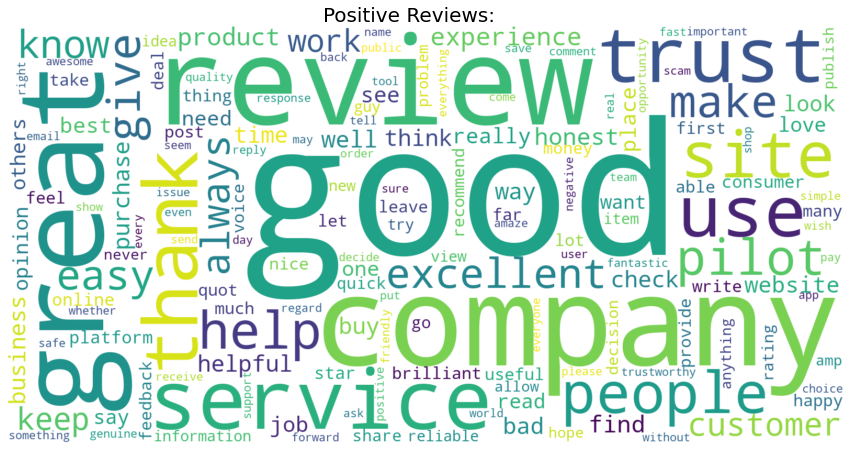

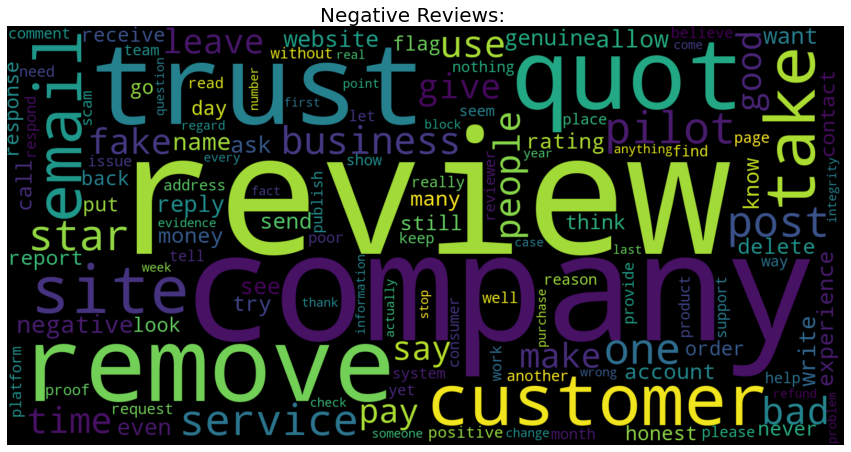

In [32]:
# # WordCoulds for Positive Reviews
pos_wordcloud = wordcloud(pos_reviews,'new_text', 'white','Positive Reviews: ')

# # WordCoulds for Negative Reviews
neg_wordcloud = wordcloud(neg_reviews,'new_text', 'black', 'Negative Reviews:')

In [33]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

#Create two new columns
reviews_text_rating['Subjectivity'] = reviews_text_rating['new_text'].apply(subjectivity)
reviews_text_rating['Polarity'] = reviews_text_rating['new_text'].apply(polarity)

In [34]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

reviews_text_rating['Analysis'] = reviews_text_rating['Polarity'].apply(getAnalysis)

In [35]:

# plot the polarity and subjectivity
fig = px.scatter(reviews_text_rating, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

In [ ]:
###The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is. The green dots lies on the vertical line are the "neutral" reviews, the red dots on the left are the "negative" reviews, and the blue dots on the right are the "positive" reviews. Bigger dots indicate more subjectivity. We see that positive reviews are more than the negatives.

In [36]:
def optimal_lda_model(df_review, review_colname):
    '''
    INPUTS:
        df_review - dataframe that contains the reviews
        review_colname: name of column that contains reviews
        
    OUTPUTS:
        lda_tfidf - Latent Dirichlet Allocation (LDA) model
        dtm_tfidf - document-term matrix in the tfidf format
        tfidf_vectorizer - word frequency in the reviews
        A graph comparing LDA Model Performance Scores with different params
    '''
    docs_raw = df_review[review_colname].tolist()

    #************   Step 1: Convert to document-term matrix   ************#

    #Transform text to vector form using the vectorizer object 
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                    stop_words = 'english',
                                    lowercase = True,
                                    token_pattern = r'\b[a-zA-Z]{3,}\b', # num chars > 3 to avoid some meaningless words
                                    max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                    min_df = 10)                         # discard words that appear in < 10 reviews    

    #apply transformation
    tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

    #convert to document-term matrix
    dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)  

    print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_colname, dtm_tfidf.shape[1]))

    
    #*******   Step 2: GridSearch & parameter tuning to find the optimal LDA model   *******#

    # Define Search Param
    search_params = {'n_components': [5, 10, 15, 20, 25, 30], 
                     'learning_decay': [.5, .7, .9]}

    # Init the Model
    lda = LatentDirichletAllocation()

    # Init Grid Search Class
    model = GridSearchCV(lda, param_grid=search_params)

    # Do the Grid Search
    model.fit(dtm_tfidf)


    #*****  Step 3: Output the optimal lda model and its parameters  *****#

    # Best Model
    best_lda_model = model.best_estimator_

    # Model Parameters
    print("Best Model's Params: ", model.best_params_)

    # Log Likelihood Score: Higher the better
    print("Model Log Likelihood Score: ", model.best_score_)

    # Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
    print("Model Perplexity: ", best_lda_model.perplexity(dtm_tfidf))


    #***********   Step 4: Compare LDA Model Performance Scores   ***********#

    #Get Log Likelyhoods from Grid Search Output
    gscore=model.fit(dtm_tfidf).cv_results_
    n_topics = [5, 10, 15, 20, 25, 30]

    log_likelyhoods_5 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.5]
    log_likelyhoods_7 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.7]
    log_likelyhoods_9 = [gscore['mean_test_score'][gscore['params'].index(v)] for v in gscore['params'] if v['learning_decay']==0.9]

    # Show graph
    plt.figure(figsize=(12, 8))
    plt.plot(n_topics, log_likelyhoods_5, label='0.5')
    plt.plot(n_topics, log_likelyhoods_7, label='0.7')
    plt.plot(n_topics, log_likelyhoods_9, label='0.9')
    plt.title("Choosing Optimal LDA Model")
    plt.xlabel("Num Topics")
    plt.ylabel("Log Likelyhood Scores")
    plt.legend(title='Learning decay', loc='best')
    plt.show()
    
    return best_lda_model, dtm_tfidf, tfidf_vectorizer


The shape of the tfidf is (1161, 579), meaning that there are 1161 new_text and 579 tokens made through the filtering process.
Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Model Log Likelihood Score:  -6643.583402797542
Model Perplexity:  1139.7503815211874


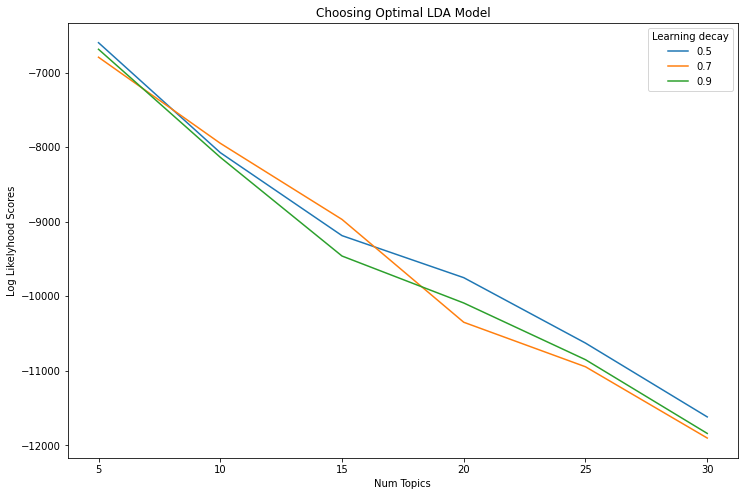

In [37]:
best_lda_model, dtm_tfidf, tfidf_vectorizer = optimal_lda_model(neg_reviews, 'new_text')

In [38]:
#Create a function to inspect the topics we created 
def display_topics(model, feature_names, n_top_words):
    '''
    INPUTS:
        model - the model we created
        feature_names - tells us what word each column in the matric represents
        n_top_words - number of top words to display

    OUTPUTS:
        a dataframe that contains the topics we created and the weights of each token
    '''
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx+1)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx+1)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


display_topics(best_lda_model, tfidf_vectorizer.get_feature_names(), n_top_words = 20)

,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights
0,unsubscribe,7.1,wrong,9.3,review,76.3,account,10.4,reviews,24.8
1,terrible,3.6,email,7.9,trustpilot,59.9,want,8.6,trustpilot,15.8
2,scammers,3.1,address,7.8,reviews,59.4,don,7.2,trust,15.7
3,bots,3.0,published,6.9,company,41.5,review,6.8,company,14.5
4,worst,3.0,change,5.4,quot,36.7,stop,6.4,fake,13.8
5,trustpilot,2.9,delete,5.3,trust,30.0,like,6.0,review,13.2
6,legitimate,2.9,review,4.5,removed,24.7,just,5.9,bad,11.8
7,mean,2.8,blocked,4.1,service,24.6,know,5.3,scam,11.6
8,right,2.5,spam,4.0,companies,24.4,sending,4.9,companies,11.0
9,deleting,2.5,read,3.8,customer,22.7,did,4.7,pilot,10.1


In [42]:
print(dtm_tfidf)

  (0, 426)	0.18031442738797115
  (0, 421)	0.2570760265729225
  (0, 405)	0.22003428266637268
  (0, 403)	0.14341018949001083
  (0, 362)	0.27012396598381966
  (0, 350)	0.2360374161648791
  (0, 349)	0.18138505226780524
  (0, 348)	0.18526942559145695
  (0, 343)	0.21485302164902492
  (0, 326)	0.2101660009364429
  (0, 89)	0.23997363608941638
  (0, 86)	0.10558691899127474
  (0, 76)	0.5138633660337487
  (0, 54)	0.15614009769445863
  (0, 29)	0.4347508923100775
  (1, 561)	0.3556103247549863
  (1, 518)	0.18343051540208524
  (1, 507)	0.23032949183401646
  (1, 477)	0.295588797903243
  (1, 435)	0.2820375749856036
  (1, 421)	0.12241108522472972
  (1, 312)	0.3670270608191893
  (1, 247)	0.2507358212869648
  (1, 216)	0.25563887962534093
  (1, 198)	0.2686162017428422
  :	:
  (1157, 113)	0.0904236320278315
  (1157, 112)	0.33969310224086574
  (1157, 94)	0.12518338434635123
  (1157, 85)	0.07390801525583643
  (1157, 80)	0.12714650085064652
  (1157, 41)	0.10828048069984733
  (1157, 28)	0.22071837979652706
  (1

In [39]:
pd.options.display.max_colwidth = 5000

In [41]:
# Topic Modelling Visualization for the Negative Reviews
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.sklearn.prepare(best_lda_model, dtm_tfidf, tfidf_vectorizer, mds='tsne')
pyLDAvis.display(vis)

There are a lot of moving parts in the visualization. Here's a brief summary:

On the left, there is a plot of the "distance" between all of the topics (labeled as the Intertopic Distance Map)
The plot is rendered in two dimensions according a multidimensional scaling (MDS) algorithm. Topics that are generally similar should be appear close together on the plot, while dissimilar topics should appear far apart.

The relative size of a topic's circle in the plot corresponds to the relative frequency of the topic in the corpus.

An individual topic may be selected for closer scrutiny by clicking on its circle, or entering its number in the "selected topic" box in the upper-left.

On the right, there is a bar chart showing top terms.
When no topic is selected in the plot on the left, the bar chart shows the top most "salient" terms in the corpus. A term's saliency is a measure of both how frequent the term is in the corpus and how "distinctive" it is in distinguishing between different topics.

When a particular topic is selected, the bar chart changes to show the top most "relevant" terms for the selected topic. The relevance metric is controlled by the parameter λλ, which can be adjusted with a slider above the bar chart.

Setting the λλ parameter close to 1.0 (the default) will rank the terms solely according to their probability within the topic.

Setting λλ close to 0.0 will rank the terms solely according to their "distinctiveness" or "exclusivity" within the topic — i.e., terms that occur only in this topic, and do not occur in other topics.

Setting λλ to values between 0.0 and 1.0 will result in an intermediate ranking, weighting term probability and exclusivity accordingly.

Rolling the mouse over a term in the bar chart on the right will cause the topic circles to resize in the plot on the left, to show the strength of the relationship between the topics and the selected term.

In [43]:
pyLDAvis.save_html(vis, 'lda_.html')